<a href="https://colab.research.google.com/github/tanuja1708/EEG-emotions/blob/main/SEED(de_LDS)%20in%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
X shape: (152730, 62, 5)
Y shape: (152730,)
New Y shape (after encoding): (152730, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.3890 - loss: 1.0820 - val_accuracy: 0.5533 - val_loss: 0.9383
Epoch 2/20
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.5332 - loss: 0.9350 - val_accuracy: 0.5865 - val_loss: 0.8119
Epoch 3/20
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6150 - loss: 0.7834 - val_accuracy: 0.6435 - val_loss: 0.7008
Epoch 4/20
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.7081 - loss: 0.6262 - val_accuracy: 0.7597 - val_loss: 0.5266
Epoch 5/20
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.7926 - loss: 0.4716 - val_accuracy: 0.8413 - val_loss: 0.3721
Epoch 6/20
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8599 - loss: 0.3404 - val_accuracy: 0.8927 - val_loss: 0.2672
Epoch 7/20
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8947 - loss: 0.2642 - val_accuracy: 0.9487 - val_loss: 0.1429
Epoch 8/20
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.9166 -

Test Accuracy: 0.9911


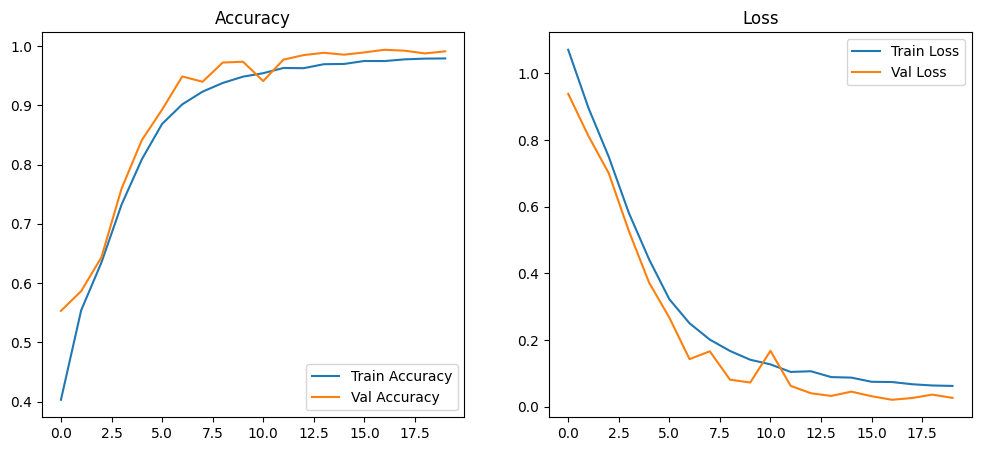

In [3]:
# Mount Google Drive (if files are stored there)
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the data
X = np.load('/content/X_final.npy')  # Update path if stored in Drive
Y = np.load('/content/y_final.npy')  # Update path if stored in Drive

print("X shape:", X.shape)  # Expected: (152730, 62, 5)
print("Y shape:", Y.shape)  # Expected: (152730,)

# Encode labels if categorical
if Y.ndim == 1:  # If Y is 1D, convert to one-hot encoding
    label_encoder = LabelEncoder()
    Y = label_encoder.fit_transform(Y)  # Convert to integer labels
    Y = to_categorical(Y)  # Convert to one-hot encoding

print("New Y shape (after encoding):", Y.shape)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(Y.shape[1], activation='softmax')  # Output layer for classification
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_test, Y_test))

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save the trained model
model.save('/content/lstm_model.h5')

# Plot accuracy & loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()
